## Import Library

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_samples, silhouette_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import Dataset

In [152]:
df_customers = pd.read_csv('../Data/clean/customers.csv')
df_merged = pd.read_csv('../Data/clean/merged.csv')

# create clustering dataset
df_clustering = df_merged.reset_index().groupby('CustomerID').agg(Frequency = ('TransactionID', 'count'),
                                                            Total_Quantity = ('Qty', 'sum'),
                                                            Total_Amount_Sales = ('TotalAmount', 'sum'))
df_clustering = df_clustering.merge(df_customers.set_index('CustomerID'), how = 'left', left_index = True, right_index = True)
df_clustering['Gender'] = df_clustering['Gender'].replace({1:'Man', 0:'Woman'})
df_clustering


,Frequency,Total_Quantity,Total_Amount_Sales,Age,Gender,Marital Status,Income
CustomerID,,,,,,,
1,17,60,623300,55,Man,Married,5.12
2,13,57,392300,60,Man,Married,6.23
3,15,56,446200,32,Man,Married,9.17
4,10,46,302500,31,Man,Married,4.87
5,7,27,268600,58,Man,Married,3.57
...,...,...,...,...,...,...,...
442,13,37,269400,42,Man,Married,14.88
444,18,62,577700,53,Woman,Married,15.31
445,18,68,587200,51,Woman,Married,14.48


## Explanatory Data Analysis

In [153]:
num = ['Frequency', 'Total_Quantity', 'Total_Amount_Sales', 'Age', 'Income']
cat = ['Gender', 'Marital Status']

# helper function to plot data distribution of numerical columns
def check_dist_num(input_data, columns):
    fig = plt.figure(figsize = (25, 25))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(6, 6, i)
        ax = sns.boxplot(x = input_data[col], color = '#90B77D')
        ax.set(xlabel = None, ylabel = None)
        plt.title(str(col), loc = 'center', fontsize = 16)
        plt.xticks(rotation = 20, fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.tight_layout()
        i += 1
    plt.show()

    fig = plt.figure(figsize = (25, 25))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(6, 6, i)
        ax = sns.distplot(x = input_data[col], color = '#90B77D')
        ax.set(xlabel = None, ylabel = None)
        plt.title(str(col), loc = 'center', fontsize = 16)
        plt.xticks(rotation = 20, fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.tight_layout()
        i += 1
    plt.show()
    
# helper function to plot data distribution of categorical columns
def check_dist_cat(input_data, columns):
    fig = plt.figure(figsize = (15, 11))
    i = 1
    for col in input_data[columns].columns:
        plt.subplot(5, 5, i)
        ax = sns.countplot(data = input_data[columns], y = input_data[col], palette = 'tab20')
        ax.set(xlabel = None, ylabel = None)
        plt.title(str(col), loc = 'center', fontsize = 10)
        plt.xticks(rotation = 0, fontsize = 8)
        plt.yticks(fontsize = 8)
        plt.tight_layout()
        i += 1
    plt.show()

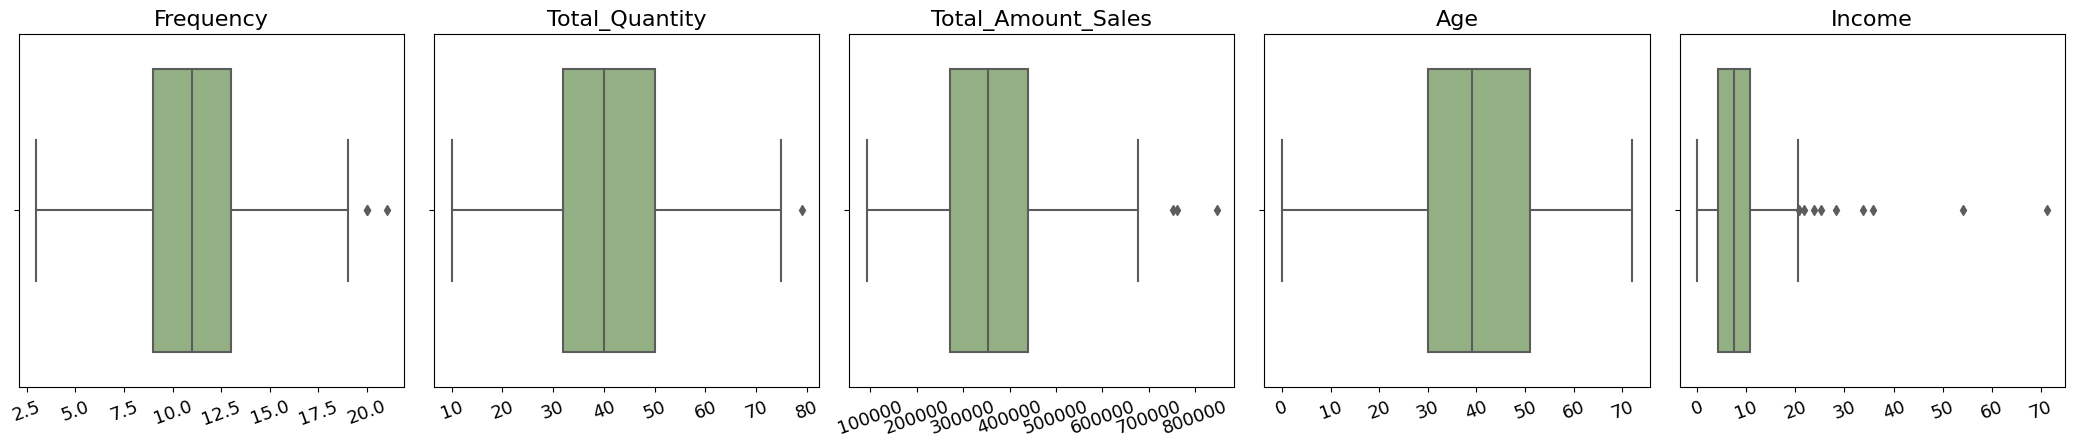

/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

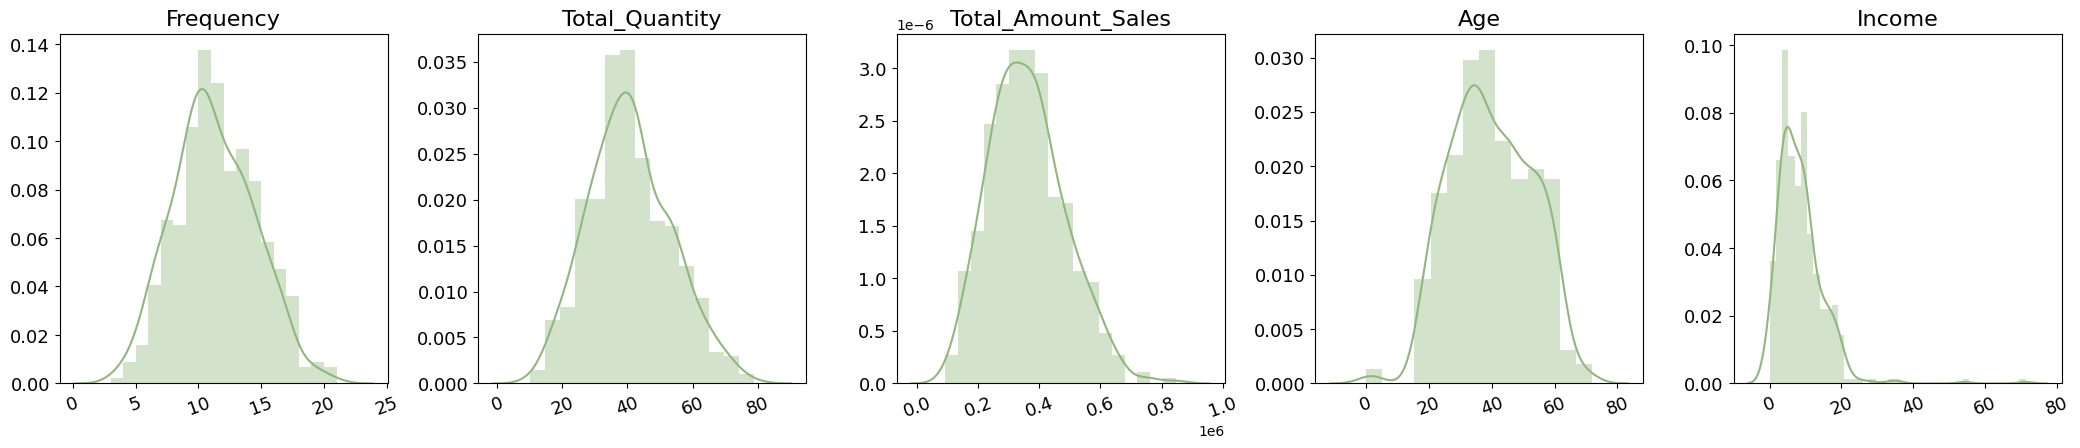

,count,mean,std,min,25%,50%,75%,max
Frequency,444.0,11.207207,3.242960,3.0,9.00,11.00,13.000,21.0
Total_Quantity,444.0,40.822072,12.723926,10.0,32.00,40.00,50.000,79.0
Total_Amount_Sales,444.0,361641.216216,124596.157539,92100.0,270675.00,353200.00,439750.000,846700.0
Age,444.0,39.840090,12.870745,0.0,30.00,39.00,51.000,72.0
Income,444.0,8.612523,6.621154,0.0,4.21,7.53,10.845,71.3


In [154]:
# numerical columns
check_dist_num(df_clustering, num)
df_clustering[num].describe().T

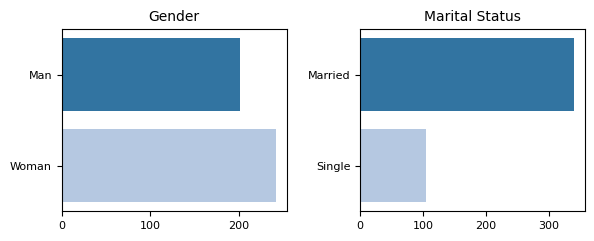

,count,unique,top,freq
Gender,444,2,Woman,242
Marital Status,444,2,Married,340


In [155]:
# categorical columns
check_dist_cat(df_clustering, cat)
df_clustering[cat].describe().T

## Remove Outliers

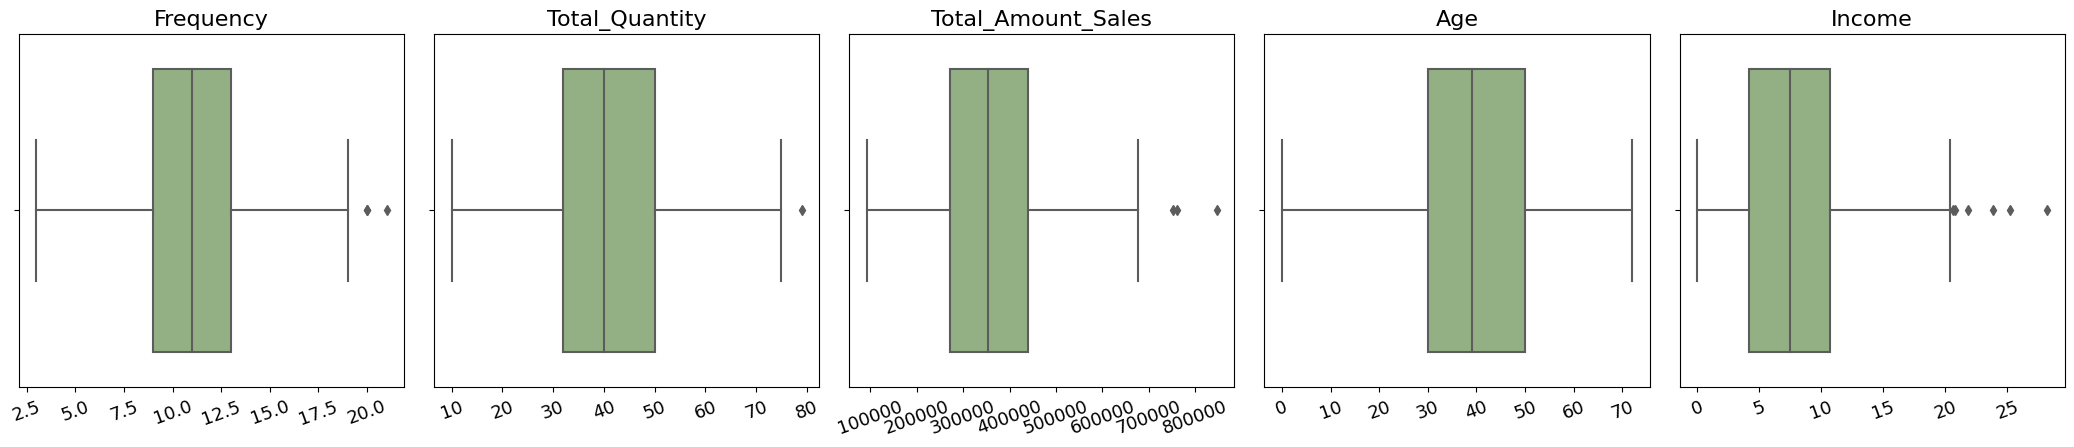

/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_232701/3236729568.py:23: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

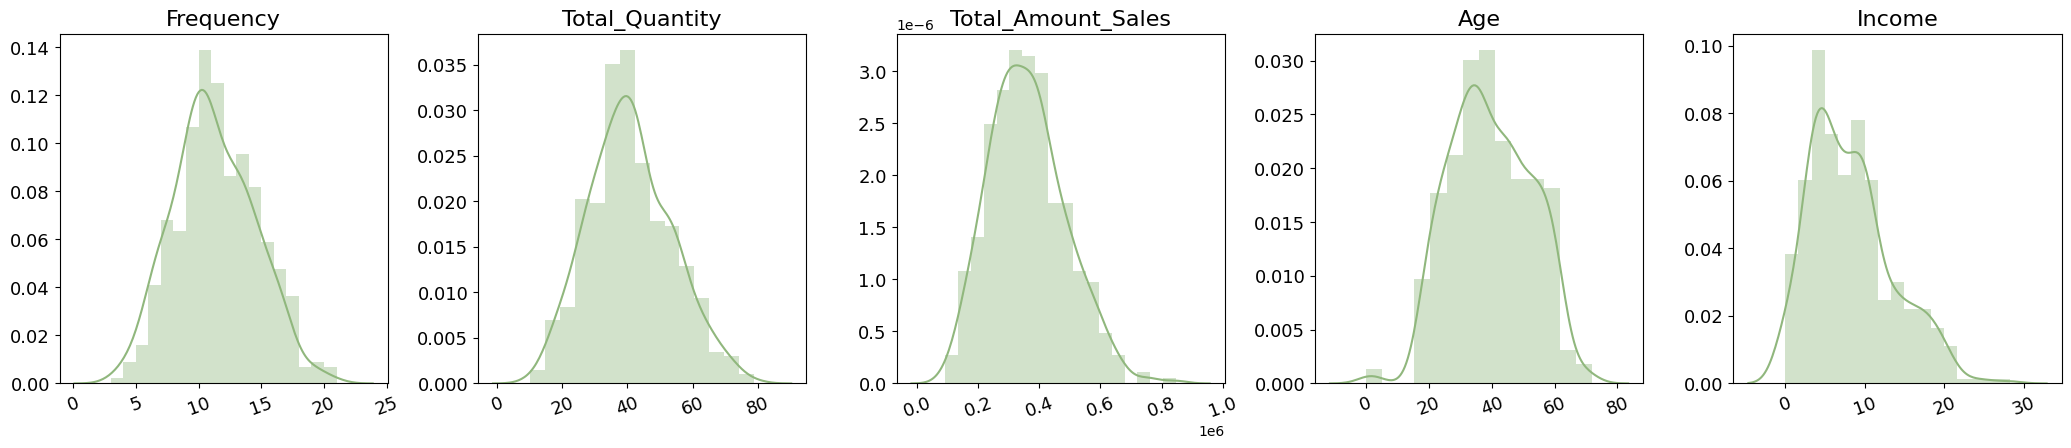

In [156]:
# helper function to remove outlier with z-score method
def z_score_outliers(input_data, column):
    upper_bound = input_data[column].mean() + 3*input_data[column].std()
    lower_bound = input_data[column].mean() - 3*input_data[column].std()
    output_data = input_data[(input_data[column] < upper_bound) & (input_data[column] > lower_bound)]
    return output_data

# remove outliers in 'Income' and 'Recency' so that they are not too skewed
df_clustering_no_outliers = z_score_outliers(df_clustering, 'Income')

# check the distribution again
check_dist_num(df_clustering_no_outliers, num)

In [157]:
# check outliers for 'Income' == 0
print(35*'=', 'Zero Income Customers', 35*'=')
income_is_0 = df_clustering_no_outliers[df_clustering_no_outliers['Income'] == 0]
display(income_is_0)

# check outliers for 'Age' < 18 years old
print(35*'=', 'Customers with Age < 18', 35*'=')
age_less_18 = df_clustering_no_outliers[df_clustering_no_outliers['Age'] < 18]
display(age_less_18)

=================================== Zero Income Customers ===================================


,Frequency,Total_Quantity,Total_Amount_Sales,Age,Gender,Marital Status,Income
CustomerID,,,,,,,
67,14,57,442600,19,Woman,Single,0.0
90,10,38,367800,21,Man,Single,0.0
164,13,40,296700,18,Man,Single,0.0
226,8,37,381600,18,Woman,Single,0.0
252,10,35,278000,18,Man,Single,0.0
267,12,47,378000,22,Woman,Single,0.0
283,17,61,499400,19,Man,Single,0.0
285,13,42,277000,20,Woman,Single,0.0
288,10,35,340800,22,Woman,Single,0.0


=================================== Customers with Age < 18 ===================================


,Frequency,Total_Quantity,Total_Amount_Sales,Age,Gender,Marital Status,Income
CustomerID,,,,,,,
12,16,61,582500,2,Man,Married,4.94
74,6,21,181600,3,Man,Married,5.09
128,9,30,294600,0,Man,Married,6.77


In [158]:
# compute the average 'Age' group by 'Gender' and 'Marital Status'
avg_age = df_clustering_no_outliers.groupby(['Gender', 'Marital Status'])[['Age']].mean().round().astype(int)

# take the average age for married man
impute_avg_age = avg_age.loc[('Man', 'Married')].values[0]

# get the index from the data we want to impute
id_cust = age_less_18.index

# impute the average age
df_clustering_no_outliers.loc[id_cust, ['Age']] = impute_avg_age

## K-Means Clustering

In [159]:
customer_data = df_merged.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Jumlah transaksi
    'Qty': 'sum',              # Total kuantitas yang dibeli
    'TotalAmount': 'sum'       # Total jumlah pembelian
}).reset_index()
     

In [160]:
# Pemilihan fitur untuk clustering
X = customer_data[['TransactionID', 'Qty', 'TotalAmount']]

In [161]:

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [162]:
# Menentukan jumlah cluster (gunakan metode Elbow)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

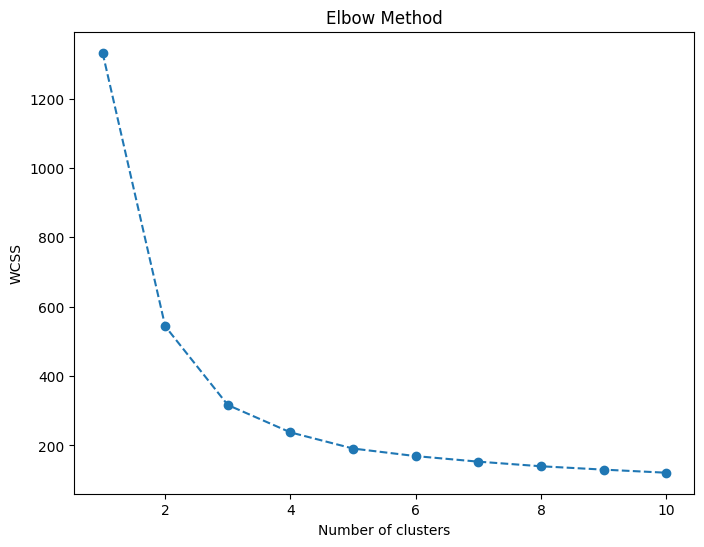

In [163]:
# Plot Elbow Method untuk menentukan jumlah cluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [164]:
n_clusters = 4

In [165]:

# Menerapkan algoritma K-Means dengan jumlah cluster yang telah dipilih
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [166]:

# Menampilkan hasil clustering
print(customer_data)
     

     CustomerID  TransactionID  Qty  TotalAmount  Cluster
0             1             17   60       623300        3
1             2             13   57       392300        2
2             3             15   56       446200        2
3             4             10   46       302500        0
4             5              7   27       268600        1
..          ...            ...  ...          ...      ...
439         442             13   37       269400        0
440         444             18   62       577700        3
441         445             18   68       587200        3
442         446             11   42       423300        0
443         447             13   42       439300        2

[444 rows x 5 columns]


In [167]:

merged_dataset = df_merged.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID', how='left')
merged_dataset
     

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Cluster
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers,0
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,Yoghurt,2
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Gita Ginara,Gita,General Trade,-6.966667,110.416664,Choco Bar,0
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,-6.966667,110.416664,Choco Bar,2
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Gita Ginara,Gita,General Trade,-6.966667,110.416664,Yoghurt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR54423,243,2022-12-31,P10,15000,5,75000,3,38,0,Married,3.34,Prima Kota,Prima,Modern Trade,-7.797068,110.370529,Cheese Stick,2
4972,TR5604,271,2022-12-31,P2,3200,4,12800,9,29,0,Married,4.74,Lingga,Lingga,Modern Trade,-3.654703,128.190643,Ginger Candy,0
4973,TR81224,52,2022-12-31,P7,9400,6,56400,9,37,0,Married,3.73,Lingga,Lingga,Modern Trade,-3.654703,128.190643,Coffee Candy,0
4974,TR85016,18,2022-12-31,P8,16000,3,48000,13,47,0,Married,13.60,Buana,Buana,General Trade,-1.269160,116.825264,Oat,2


In [168]:

# Group the merged dataset by 'Cluster'
cluster_groups = merged_dataset.groupby('Cluster')

# Calculate summary statistics for each cluster
cluster_stats = cluster_groups[['Age', 'Income']].describe()

# Print the statistics for each cluster
for cluster, data in cluster_stats.iterrows():
    print(f"Cluster {cluster} statistics:")
    print(data)
    print("\n")
     

Cluster 0 statistics:
Age     count    1877.000000
        mean       40.444859
        std        12.667882
        min         0.000000
        25%        31.000000
        50%        40.000000
        75%        51.000000
        max        72.000000
Income  count    1877.000000
        mean        8.542952
        std         6.181524
        min         0.000000
        25%         4.060000
        50%         7.500000
        75%        10.910000
        max        35.780000
Name: 0, dtype: float64


Cluster 1 statistics:
Age     count    653.000000
        mean      39.753446
        std       13.613041
        min        3.000000
        25%       30.000000
        50%       39.000000
        75%       51.000000
        max       70.000000
Income  count    653.000000
        mean       8.913078
        std        8.552196
        min        0.000000
        25%        3.860000
        50%        7.220000
        75%       12.250000
        max       71.300000
Name: 1, dtype: fl

Berdasarkan ringkasan statistik di atas, kami dapat mengidentifikasi karakteristik dari masing-masing cluster sebagai berikut:

Cluster 0:
<ul>
    <li>Rata-rata usia sekitar 40 tahun dengan variasi yang relati rendah.</li>
    <li>Rata-rata pendapatan sekitar 8.54 dengan variasi yang moderat.</li>
    <li>Rentang usia berkisar antara 0 hingga 72 tahun.</li>
    <li>Rentang pendapatan berkisar antara 0 hingga 35.78.</li>
</ul>
Cluster 1:
<ul>
    <li>Rata-rata usia sekitar 39.75 tahun dengan variasi yang relatif rendah.</li>
    <li>Rata-rata pendapatan sekitar 8.91 dengan variasi yang cukup tinggi.</li>
    <li>Rentang usia berkisar antara 3 hingga 70 tahun.</li>
    <li>Rentang pendapatan berkisar antara 0 hingga 71.3.</li>
</ul>
Cluster 2:
<ul>
    <li>Rata-rata usia sekitar 39.84 tahun dengan variasi yang moderat.</li>
    <li>Rata-rata pendapatan sekitar 8.99 dengan variasi yang moderat.</li>
    <li>Rentang usia berkisar antara 18 hingga 68 tahun.</li>
    <li>Rentang pendapatan berkisar antara 0 hingga 54.2.</li>
</ul>
Cluster 3:
<ul>
    <li>Rata-rata usia sekitar 39.96 tahun dengan variasi yang cukup tinggi.</li>
    <li>Rata-rata pendapatan sekitar 8.11 dengan variasi yang moderat.</li>
    <li>Rentang usia berkisar antara 2 hingga 61 tahun.</li>
    <li>Rentang pendapatan berkisar antara 0 hingga 20.81.</li>
</ul>
Dari statistik di atas, terlihat perbedaan karakteristik antara cluster-cluster tersebut. Cluster 1 memiliki variasi pendapatan yang tinggi, sementara Cluster 0 memiliki variasi pendapatan yang lebih rendah. Cluster 3 memiliki variasi usia yang tinggi dan pendapatan yang lebih rendah. Cluster 2 memiliki usia yang lebih tinggi dan pendapatan sedang.

Dengan informasi ini, kita dapat memahami karakteristik unik dari masing-masing cluster dan merencanakan tindakan yang sesuai, seperti menyesuaikan strategi pemasaran atau segmentasi pelanggan.





